# EVALUACIÓN DE OPCIONES DE ADAPTACIÓN EN EL AREA METROPOLITANA DE SAN SALVADOR (AMSS)

El Crecimiento económico y el crecimiento demográfico, así como el cambio climático harán modificar la estimación del riesgo  obtenida en [San Salvador Risk](San_Salvador_Risk.ipynb) para los próximos años. En esta sección, se considerará un posible futuro escenario climático y se mostrará cómo este escenario podría afectar a la región de estudio. Además, se estudiarán una lista de posibles medidas de adaptación y se analizarán a través de la relación costo-beneficio de cada una. 

También se analizará el efecto de la transferencia de riesgo (también denominado aseguramiento de los bienes) y su relación con las medidas de adaptación. Lo anterior, permitirá mostrar el potencial que tiene **la transferencia de riesgo en incentivar la adaptación** a través de su _complementación_ con un conjunto de medidas de adaptación.

## BIENES DEL AMSS EN 2015

La estructura _entity_ de CLIMADA (entidad, en inglés) contiene los parámetros socio-económicos para un año específico. Estos parámetros son: exposición (los bienes y sus coordenadas de localización), funciones de impacto para cada categoría de bienes, medidas de adaptación y tasas de descuento asociada a los bienes para los siguientes años.  `FL_entity_Acelhuate_houses.xlsx` contiene la entidad para una región determinada del AMSS del año 2015:

2021-04-28 17:18:56,569 - climada.entity.exposures.base - INFO - meta set to default value {}
2021-04-28 17:18:56,570 - climada.entity.exposures.base - INFO - tag set to default value  File: 
 Description: 
2021-04-28 17:18:56,571 - climada.entity.exposures.base - INFO - ref_year set to default value 2018
2021-04-28 17:18:56,572 - climada.entity.exposures.base - INFO - value_unit set to default value USD
2021-04-28 17:18:56,573 - climada.entity.exposures.base - INFO - crs set to default value: EPSG:4326


/Users/zeliestalhanske/python_projects/climada_python/climada/entity/exposures/base.py:221: FutureWarning: Assigning CRS to a GeoDataFrame without a geometry column is now deprecated and will not be supported in the future.
  self.gdf.crs = self.meta['crs']


2021-04-28 17:18:59,066 - climada.entity.exposures.base - INFO - meta set to default value {}
2021-04-28 17:18:59,067 - climada.entity.exposures.base - INFO - tag set to default value  File: 
 Description: 
2021-04-28 17:18:59,067 - climada.entity.exposures.base - INFO - ref_year set to default value 2018
2021-04-28 17:18:59,068 - climada.entity.exposures.base - INFO - value_unit set to default value USD
2021-04-28 17:18:59,069 - climada.entity.exposures.base - INFO - crs set to default value: EPSG:4326
2021-04-28 17:18:59,222 - climada.entity.exposures.base - INFO - category_id not set.
2021-04-28 17:18:59,222 - climada.entity.exposures.base - INFO - geometry not set.
2021-04-28 17:18:59,223 - climada.entity.exposures.base - INFO - region_id not set.
2021-04-28 17:18:59,224 - climada.entity.exposures.base - INFO - centr_ not set.
2021-04-28 17:18:59,225 - climada.entity.impact_funcs.base - WARNING - For intensity = 0, mdd != 0 or paa != 0. Consider shifting the origin of the intensity

<ipython-input-6-949bee5a61a5>:12: FutureWarning: The "contextily.tile_providers" module is deprecated and will be removed in contextily v1.1. Please use "contextily.providers" instead.
  ax = ent_2015.exposures.plot_basemap(s=1, zoom=15, url=ctx.sources.OSM_A, vmax=60000, cmap='autumn')


2021-04-28 17:19:00,530 - climada.entity.exposures.base - INFO - Setting latitude and longitude attributes.
2021-04-28 17:19:01,835 - climada.entity.exposures.base - INFO - Setting latitude and longitude attributes.


<AxesSubplot:title={'center':'Discount rates'}, xlabel='Year', ylabel='discount rate (%)'>

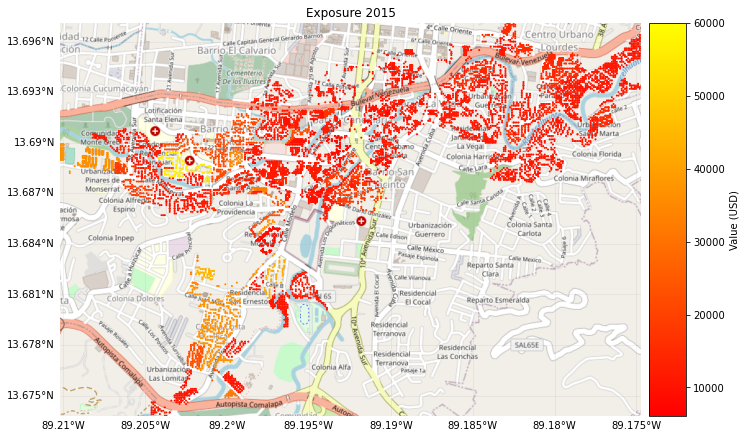

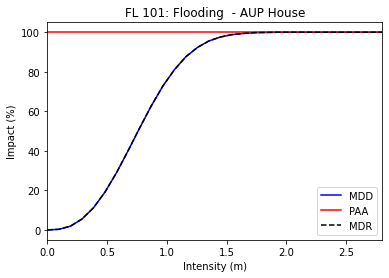

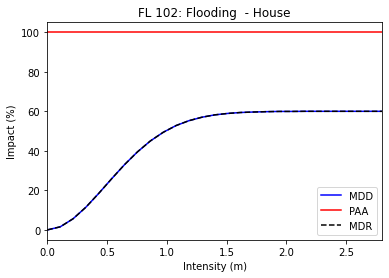

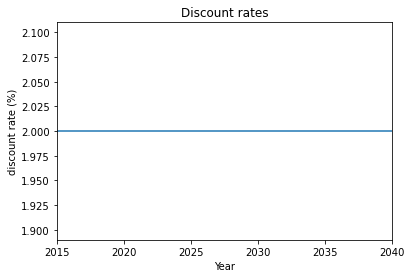

In [6]:
%matplotlib inline
import contextily as ctx
from climada.entity import Entity

ent_2015 = Entity()
ent_2015.read_excel('FL_entity_Acelhuate_houses.xlsx')
ent_2015.exposures.ref_year = 2015 # fijamos el año de referencia
ent_2015.check()

# Exposures (bienes): los utilizados en el script San Salvador Risk
print('Total value in 2015: {:.3e}'.format(ent_2015.exposures.gdf.value.sum()))
ax = ent_2015.exposures.plot_basemap(s=1, zoom=15, url=ctx.sources.OSM_A, vmax=60000, cmap='autumn')
ax.set_title('Exposure 2015')

# Impact Functions (funciones de impacto): los utilizados en el script San Salvador Risk
ent_2015.impact_funcs.get_func('FL', 101).plot()
ent_2015.impact_funcs.get_func('FL', 102).plot()

# Discount rate (tasas de descuento): 2% anual hasta 2040
ent_2015.disc_rates.plot()

# Adaptation measures (medidas de adaptación): las analizaremos más adelante

## BIENES EN 2040: CRECIMIENTO ECONÓMICO MODERADO

En 2014, la actividad económica tuvo un incremento del 2% en el AMSS. Los sectores con el crecimiento económico más acelerado fueron vivienda y servicios (4%), sector seguro y bancario (3.4%), servicios comunales (3.2%) y hoteleria y turismo (3.2%). Para el análisis se ha considerado una tasa de descuento promedio del 2%. Se consideró que el tipo o características de construcción de los bienes se mantiene igual, de tal forma que, las funciones de daño o impacto no se modifican en el tiempo.

In [7]:
import copy

# igual que en 2015 2015
ent_2040 = copy.deepcopy(ent_2015)

# Exposures (bienes): crecimiento anual del 2%
ent_2040.exposures.ref_year = 2040
growth = 0.02
ent_2040.exposures['value'] = ent_2040.exposures.value.values*(1 + growth)**(ent_2040.exposures.ref_year - ent_2015.exposures.ref_year)
ent_2040.check() # check values are well set and assignes default values

print('Valor total en 2040: {:.3e}'.format(ent_2040.exposures.value.sum()))
ax = ent_2040.exposures.plot_basemap(s=1, zoom=15, url=ctx.sources.OSM_A, vmax=60000, cmap='autumn')
ax.set_title('Exposure 2040')

AttributeError: 'Exposures' object has no attribute 'value'

## AMENAZAS EN 2015

Los modelos de inundación para 2015 son los mismo que los utilizados en [San Salvador Risk](San_Salvador_Risk.ipynb). Estos son recopilados en la clase de CLIMADA llamada _Hazard_ (amenaza, en inglés):

In [ ]:
# inundaciones en 2015
import matplotlib.patches as patches
from climada.hazard import Hazard

HAZ_FILE = 'Salvador_hazard_FL_2015.mat'

haz_2015 = Hazard('FL')     # fijamos el tipo de amenaza: FL indica "flood" (inundación en inglés)
haz_2015.read_mat(HAZ_FILE) # cargamos el fichero
ax = haz_2015.plot_intensity(0)  # intensidad máxima alcanzada en cada punto
rect = patches.Rectangle((-89.2102, 13.6738), 0.0355, 0.0233, linewidth=1, edgecolor='r', facecolor='none') # add exposures focus
ax.add_patch(rect)

El rectángulo rojo realza la localización de los bienes considerados.

## AMENAZAS EN 2040: ESCENARIO DE CAMBIO CLIMATICO EXTREMO

Para las proyecciones futuras de cambio climático, según lo reportado para 2015, se espera que los cambios de frecuencia de precipitaciones oscilen entre -16% and 5%. Como consecuencia, las inundaciones se podrían incrementar en un 10% en un escenario de cambio climático extremo como se representa en el siguiente modelo de inundación:

In [ ]:
# inundaciones en 2040 bajo un fuerte cambio climático
from climada.hazard import Hazard

HAZ_FILE = 'Salvador_hazard_FL_2040_extreme_cc.mat'

haz_2040 = Hazard('FL')     # fijamos el tipo de amenaza: FL indica "flood" (inundación en inglés)
haz_2040.read_mat(HAZ_FILE) # cargamos el fichero
ax = haz_2040.plot_intensity(0)  # intensidad máxima alcanzada en cada punto
rect = patches.Rectangle((-89.2102, 13.6738), 0.0355, 0.0233, linewidth=1, edgecolor='r', facecolor='none') # add exposures focus
ax.add_patch(rect)

## DAÑO ESPERADO POR INUNDACIÓN EN EL FUTURO

La siguiente gráfica muestra el impacto anual esperado (ver nota) que se tendrá por efectos de riesgo por inundación en la región de estudio del AMSS, específicamente en el Río Acelhuate.

En 2015, el impacto anual esperado es de 3.56 millones de dólares americanos (USD). En 2040, tomando en cuenta el crecimiento socio-económico, el riesgo por inundación se incrementa por 2.28 millones de dólares y por cambio climático el incremento es de 1.59 millones; obteniendo un impacto anual esperado de 7.43 millones de dólares (más del doble con respecto a 2015).

_Nota: el impacto anual esperado (EAI, por sus siglas en inglés) representa el impacto medio esperado por año a largo plazo, promediado sobre varios años. Este es uno de las principales mediciones de riesgo implementadas en CLIMADA, ver [Aznar-Siguan and Bresch, 2019](https://doi.org/10.5194/gmd-12-3085-2019) para mayor detalle. Regularmente, el impacto es denominado como daño (especialmente en el contexto de adaptación) y en ocasiones se conoce como pérdida (en el contexto de seguros). Tomar en cuenta que se muestra las gráficas con números enteros._

In [ ]:
# Impacto anual esperado
from climada.engine import CostBenefit

cb_acel = CostBenefit()
ax = cb_acel.plot_waterfall(haz_2015, ent_2015, haz_2040, ent_2040)
ax.set_title('Expected Annual Impact')

Si se observa el impacto excedido para una período de retorno determinado (en lugar del impacto anual esperado), los números cambian considerablemente. La métrica de riesgo utilizada en CLIMADA puede ser cambiada usando las funciones de riesgo definidas de la siguiente forma.

Aquí, se muestra el impacto para en el período de retorno de uno cada 100 años. El "Impacto superior para un período de retorno de 100 años" también podría denominarse como "el 1% de probabilidad de tener una pérdida igual o mayor a esa cantidad cada año.

2021-04-28 17:19:04,936 - climada.entity.exposures.base - INFO - Matching 12472 exposures with 153222 centroids.
2021-04-28 17:19:06,589 - climada.engine.impact - INFO - Calculating damage for 12472 assets (>0) and 6 events.
2021-04-28 17:19:06,606 - climada.entity.exposures.base - INFO - Matching 12472 exposures with 153222 centroids.
2021-04-28 17:19:08,283 - climada.engine.impact - INFO - Calculating damage for 12472 assets (>0) and 6 events.
2021-04-28 17:19:08,311 - climada.engine.cost_benefit - INFO - Risk at 2015: 4.912e+07
2021-04-28 17:19:08,312 - climada.engine.impact - INFO - Exposures matching centroids found in centr_FL
2021-04-28 17:19:08,315 - climada.engine.impact - INFO - Calculating damage for 12472 assets (>0) and 6 events.
2021-04-28 17:19:08,325 - climada.engine.cost_benefit - INFO - Risk with development at 2040: 4.912e+07
2021-04-28 17:19:08,327 - climada.engine.cost_benefit - INFO - Risk with development and climate change at 2040: 6.654e+07


Text(0.5, 1.0, 'Impact Exceedance at 100 years Return Period')

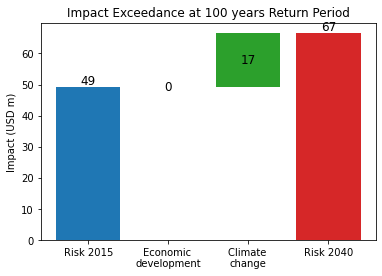

In [8]:
# Impacto excedido esperado para eventos con 100 años de retorno
from climada.engine import risk_rp_100

cb_acel = CostBenefit()
ax = cb_acel.plot_waterfall(haz_2015, ent_2015, haz_2040, ent_2040, risk_func=risk_rp_100)
ax.set_title('Impact Exceedance at 100 years Return Period')

## COSTO BENEFICIO DE LAS MEDIDAS DE ADAPTACIÓN

Algunos de los daños pueden ser evitados por la implementación de medidas de adaptación. Analizamos a continuación varias medidas que podrían ser implementadas a nivel doméstico. Este tipo de medidas tienden a ser rentables, pero de bajo impacto en el daño evitado.

La medida `No descargas en Lluvia` establece que cada habitante, de la región de interés, evita realizar descargas del inodoro durante el tiempo que está lloviendo. Entendiendo que cualquier líquido fluyendo a través de las tuberías de dreñaje de las casas es descargado a la ciudad y luego a los ríos urbanos que la atraviesan. Estas descargas circulan por barrancos, ríos y lagos hasta llegar al océano. A su paso, este flujo contamina y provoca inundaciones. Dichas inundaciones suceden principalmente durante el momento en que la lluvia es más fuerte. El costo de esta medida son la realización de los programas de concienciación, sumando un valor neto de 41'894 USD. 

Measure cost 4.189e+05 USD
2021-04-28 17:19:08,537 - climada.engine.impact - INFO - Exposures matching centroids found in centr_FL
2021-04-28 17:19:08,539 - climada.engine.impact - INFO - Calculating damage for 12472 assets (>0) and 6 events.


Text(0.5, 1.0, 'Maximumm reduced intensity with measure')

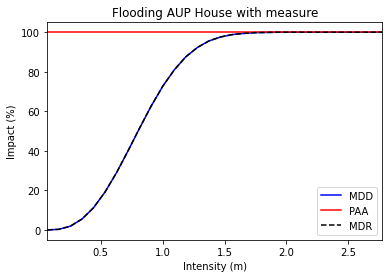

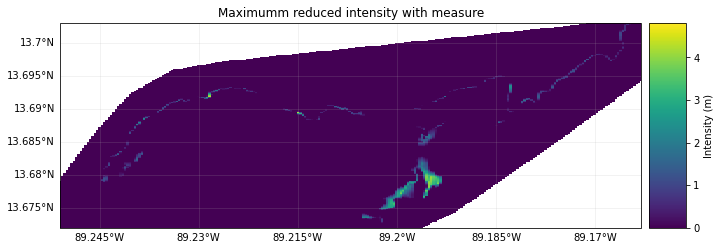

In [9]:
# impacto de la medida en 2015: No descargas en Lluvia
meas = ent_2015.measures.get_measure('FL', 'No descargas en Lluvia')
print('Measure cost {:.3e} USD'.format(meas.cost))
meas_exp_2015, meas_impf_2015, meas_haz_2015 = meas.apply(ent_2015.exposures, ent_2015.impact_funcs, haz_2015)

# los bienes no cambian

# las funciones de impacto mejoran ligeramente:
ax = meas_impf_2015.get_func('FL', 101).plot()
ax.set_title('Flooding AUP House with measure')

# inundación reducida hasta 4.8 metros en los eventos más graves:
import numpy as np
haz_diff = copy.deepcopy(haz_2015)
haz_diff.intensity = (haz_2015.intensity - meas_haz_2015.intensity)
ax = haz_diff.plot_intensity(0) # maximum intensity difference at each point
ax.set_title('Maximumm reduced intensity with measure')

Se estima la tasa costo-beneficio de las siguientes medidas domésticas. `Benefit` (beneficio, en español) se refiere al total de daños evitados cuando la medida es aplicada desde 2015 hasta 2040, por otro lado, `cost` (costo en español) se refiere a la implementación y mantenimiento de la medida hasta 2040 (y por lo tanto, se descuenta hasta 2015 y se comparan los valores netos actuales, NPVs).

In [10]:
# nombre de cada medida considerada
for meas in ent_2040.measures.get_measure('FL'): # measures related to flood (FL)
    print(meas.name)

Sanitarios de descarga Dual
Ahorradores en Agua en casas
No descargas en Lluvia
Reuso de agua de enjuage
Puentes sin basura
Captacion de agua de techos


2021-04-28 17:19:16,212 - climada.engine.impact - INFO - Exposures matching centroids found in centr_FL
2021-04-28 17:19:16,215 - climada.engine.impact - INFO - Calculating damage for 12472 assets (>0) and 6 events.
2021-04-28 17:19:16,228 - climada.engine.impact - INFO - Exposures matching centroids found in centr_FL
2021-04-28 17:19:16,230 - climada.engine.impact - INFO - Calculating damage for 12472 assets (>0) and 6 events.
2021-04-28 17:19:16,244 - climada.engine.impact - INFO - Exposures matching centroids found in centr_FL
2021-04-28 17:19:16,245 - climada.engine.impact - INFO - Calculating damage for 12472 assets (>0) and 6 events.
2021-04-28 17:19:16,268 - climada.engine.impact - INFO - Exposures matching centroids found in centr_FL
2021-04-28 17:19:16,269 - climada.engine.impact - INFO - Calculating damage for 12472 assets (>0) and 6 events.
2021-04-28 17:19:16,284 - climada.engine.impact - INFO - Exposures matching centroids found in centr_FL
2021-04-28 17:19:16,286 - climad

<AxesSubplot:xlabel='NPV averted damage over 26 years (USD m)', ylabel='Benefit/Cost ratio'>

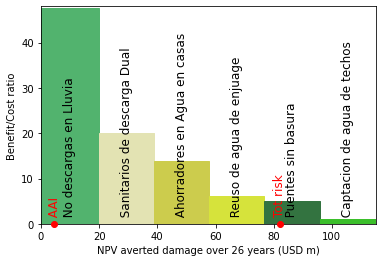

In [11]:
cb_acel = CostBenefit()
cb_acel.calc(haz_2015, ent_2015, haz_2040, ent_2040, save_imp=True) # calcula
cb_acel.plot_cost_benefit() # dibuja el cociente beneficio/costo por medida


En el ejemplo, aproximadamente todas las opciones evitan la misma cantidad de daño y presentan un beneficio mayor que los costos de implementación (la tasa beneficio / costo es mayor de 1 en todos los casos). Sin embargo, el más rentable (`No descargas en Lluvia`) es casi 45 veces más rentable que el menos (` Captacion de agua de techos`).

La marca `Tot risk` es el riesgo climático total (valor presente neto del riesgo climático total sobre un período de 26 años) y `AAI` representa el impacto anual medio, es decir, el impacto (o daño) a largo plazo promedio anual. El riesgo total no es igual a 26*AAI, ya que durante ese período de tiempo, tenemos años sin ninguna pérdida y años con pérdidas mayores al nivel promedio, todo considerado de una manera probabilística para calcular el riesgo climático total. Revisar[Aznar-Siguan and Bresch, 2019] (https://doi.org/10.5194/gmd-12-3085-2019) para más detalles. 

## TRANSFERENCIA DEL RIESGO
En lugar de aplicar todas las medidas (como se muestra arriba), se puede aplicar un subconjunto de dichas medidas. La selección de ese subconjunto podría recaer en varios motivos, por ejemplo, podrían ser aquellas medidas que son ampliamente aceptadas por los actores involucrados o aquellas medidas que están dentro de un presupuesto limitado. 

_Revisar [Souvignet et al, 2017] (https://www.kfw-entwicklungsbank.de/PDF/Download-Center/Materialien/2016_No6_Guidebook_Economics-of-Climate-Adaptation_EN.pdf) para una descripción más amplia de otras dimensiones que deben considerarse cuando se trata de una selección práctica de medidas._

Con el propósito de ilustrar cómo se puede seleccionar un subconjunto de medidas, se seleccionaron `No descargas en Lluvia` y  `Ahorradores en Agua en casas`, y se combinaron en una sola medida denominada `Domestico`. Cabe hacer notar que, mientras el costo de las dos medidas es la suma del costo de cada una, el beneficio de la combinación es menor que el beneficio de cada medida actuando sola. Esto se debe al hecho que cuando se combinan medidas, CLIMADA evita la duplicación de la cuenta del primer tipo, por ejemplo, si la primera medida reduce a cero el impacto de un determinado evento de inundación en un lugar específico, la segunda medida ya no puede reducir más los daños. _Se debe tener en cuenta que el doble conteo del segundo tipo (por ejemplo, una interacción real de medidas) no es contabilizada por obvias razones._

In [12]:
import matplotlib.colors as colors
cb_comb = cb_acel.combine_measures(['No descargas en Lluvia', 'Ahorradores en Agua en casas'],
                                    'Domestico', colors.to_rgb('lightcoral'), ent_2015.disc_rates)


Measure      Cost (USD m)    Benefit (USD m)    Benefit/Cost
---------  --------------  -----------------  --------------
Domestico         1.81542            20.9623         11.5468

--------------------  --------  -------
Total climate risk:   82.1504   (USD m)
Average annual risk:   4.52847  (USD m)
Residual risk:        61.188    (USD m)
--------------------  --------  -------
Net Present Values


Por obvias razones el riesgo climático total y el riesgo promedio anual se calculan antes de la aplicación de las medidas. Ahora el riesgo residual es mayor de cero. En el caso de aplicar todas las medidas, se podría reducir el riesgo residual a cero. Pero como se indicó anteriormente, dado que el efecto combinado de las medidas es menor o igual a la suma del beneficio único de cada medida, solo se puede obtener una representación del efecto combinado utilizando el método `combine_measures`.

Como siguiente paso, se puede introducir la transferencia de riesgos (o seguro) para absorber más daños después de la aplicación de las medidas combinadas `Domestico`. Simplemente se necesita indicar el _attachement_ (deductible) y el _cover_ (cobertura) de la capa de seguro. El deductible es la cantidad de daño debajo de la capa, es decir, daños que no provocan un pago del seguro. Este suele ser mayor que cero, tanto para evitar el manejo de reclamos espurios (que generan muchos costos de manejo) como para evitar el riesgo moral, ya que con un deductible distinto de cero, el asegurado tiene interés en gestionar activamente el riesgo para no pagar daños hasta el deductible con demasiada frecuencia. De manera similar, la cobertura define el pago máximo otorgado y limita la responsabilidad de la aseguradora. Nuevamente, esto crea un incentivo para que el asegurado administre adecuadamente los riesgos, como no exceder la cobertura, o muy rara vez. Finalmente, dado que el seguro es un servicio y tiene un costo, el factor de costo define un multiplicador aplicado al costo bruto del daño esperado dentro de la capa de seguro, para tener en cuenta la distribución, el manejo y el costo de capital del seguro. Establecemos esto aquí en un valor proxy de 1.5. Se debe tener en cuenta que, los valores reales diferirán sustancialmente, ya que tienden a reducir este factor a medida que se hace más grande el esquema.

Se define la cobertura del seguro y se aplica _después_ del efecto de las medidas, es deicr, el seguro _complementa_ a las medidas seleccionadas.

In [13]:
cb_comb.apply_risk_transfer('Domestico', attachment=1000, cover=22000000, 
                            disc_rates=ent_2015.disc_rates, cost_fix=0, cost_factor=1.5)


Measure                      Cost (USD m)    Benefit (USD m)    Benefit/Cost
-------------------------  --------------  -----------------  --------------
Domestico                         1.81542            20.9623       11.5468
risk transfer (Domestico)        65.2667             43.5111        0.666667

--------------------  --------  -------
Total climate risk:   82.1504   (USD m)
Average annual risk:   4.52847  (USD m)
Residual risk:        17.6769   (USD m)
--------------------  --------  -------

Risk transfer           Expected damage in     Price (USD m)
                    insurance layer (USD m)
---------------  --------------------------  ---------------
without measure                     63.3827          95.0741
with measure                        43.5111          65.2667

Net Present Values


Como anteriormente, las cantidades _total climate risk_ (el riesgo total) y el riesgo promedio anual (average annual risk) no cambian por razones obvias. El riesgo residual sigue siendo mayor que cero, ya que las dos medidas más el seguro no evitan todos los daños. Pero el riesgo residual es menor que sin seguro, ya que se absorbe una parte sustancial del mismo.


El efecto de la transferencia del riesgo se muestra tanto sin la aplicación de medidas (without measure), que resulta de mayor costo, como después de la aplicación de estas medidas (with measure), con la medida `Domestico`. **Si el seguro complementa a (un conjunto de) medidas, su costo se reduce sustancialmente.**

_Tener en cuenta que los montos mostrados son valores actuales netos, no pagos anuales. Dado que se muestra un período de tiempo de 26 años, los números anuales serían del orden de 1/26 de los números indicados anteriormente._

--> Se puede _**experimentar**_ el parámetro _cover=..._ para visualizar el efecto de mayor cobertura seguro otorgada.

Finalmente, se puede representar el efecto de cobertura como una curva de costo de adaptación:

<AxesSubplot:xlabel='NPV averted damage over 26 years (USD m)', ylabel='Benefit/Cost ratio'>

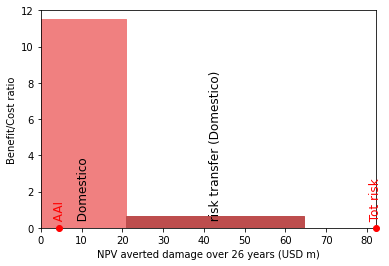

In [14]:
cb_comb.plot_cost_benefit()

## GRAFICA "CASCADA"
En una sóla gráfica se puede visualizar el impacto total acumulado (desde 2015 hasta 2040) y la cantidad total del daño evitado (utilizando todas las medidas de adpatación seleccionadas). Desde 2015 hasta 2040, si la exposición de los bienes y la amenza se mantiene igual que ahora, y considerando una tasa de descuento proporcionada por `ent_2015.disc_rates`, se obtiene una cantidad total de daño de 73 millones de dólares (USD).
Si se considera un crecimiento socio-económico moderado y un escenario de cambio climático extremo, entonces se obtinen una pérdida total esperada de 109 millones de dólares (USD), de los cuales 21 millones del incremento se deben al crecimiento económico y 15 millones por el efecto del cambio climático.

2021-04-28 17:19:26,438 - climada.engine.cost_benefit - INFO - Current total risk at 2040: 7.312e+07
2021-04-28 17:19:26,439 - climada.engine.impact - INFO - Exposures matching centroids found in centr_FL
2021-04-28 17:19:26,441 - climada.engine.impact - INFO - Calculating damage for 12472 assets (>0) and 6 events.
2021-04-28 17:19:26,453 - climada.engine.cost_benefit - INFO - Total risk with development at 2040: 7.312e+07
2021-04-28 17:19:26,454 - climada.engine.cost_benefit - INFO - Total risk with development and climate change at 2040: 8.215e+07
2021-04-28 17:19:26,482 - climada.engine.cost_benefit - INFO - Combining measures ['Sanitarios de descarga Dual', 'Ahorradores en Agua en casas', 'No descargas en Lluvia', 'Reuso de agua de enjuage', 'Puentes sin basura', 'Captacion de agua de techos']

Measure      Cost (USD m)    Benefit (USD m)    Benefit/Cost
---------  --------------  -----------------  --------------
combine           27.6951            23.9647        0.865304

------

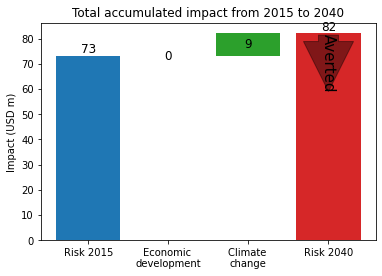

In [15]:
ax = cb_acel.plot_waterfall_accumulated(haz_2015, ent_2015, ent_2040)
cb_acel.plot_arrow_averted(ax, accumulate=True, combine=True, disc_rates=ent_2015.disc_rates) # plot total averted damages

El daño acumulado se obtiene de sumar los valores de los daños anuales esperados (o la función de riesgo seleccionada) desde 2015 hasta 2040, inclusive. 
Por el efecto de tomar en cuenta el escenario de cambio climático y el desarrollo económico de la población, el daño anual esperado para 2040 se ha incrementado con respecto al de 2015. Asumiendo que, el crecimiento del daño anual esperado se comporte linealmente desde 2015 hasta 2040, se obtiene un total de daño de 109 millones de dólares (USD) para 2040. Sin embargo, si este crecimiento sigue una tendencia sublineal o una curva superlineal, el total de las pérdidas cambia (tomando en cuenta que la tasa de descuento está bien calculada).

 

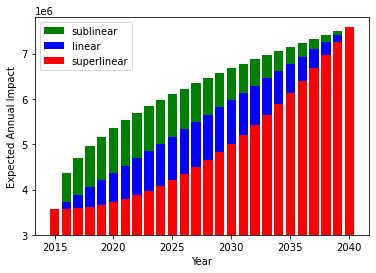

In [16]:
# show difference between sublinear, linear and superlinear expected annual damage growth
import functions_ss
functions_ss.non_linear_growth(cb_acel)

2021-04-28 17:19:30,335 - climada.engine.impact - INFO - Exposures matching centroids found in centr_FL
2021-04-28 17:19:30,338 - climada.engine.impact - INFO - Calculating damage for 12472 assets (>0) and 6 events.
2021-04-28 17:19:30,350 - climada.engine.impact - INFO - Exposures matching centroids found in centr_FL
2021-04-28 17:19:30,352 - climada.engine.impact - INFO - Calculating damage for 12472 assets (>0) and 6 events.
2021-04-28 17:19:30,366 - climada.engine.impact - INFO - Exposures matching centroids found in centr_FL
2021-04-28 17:19:30,367 - climada.engine.impact - INFO - Calculating damage for 12472 assets (>0) and 6 events.
2021-04-28 17:19:30,390 - climada.engine.impact - INFO - Exposures matching centroids found in centr_FL
2021-04-28 17:19:30,393 - climada.engine.impact - INFO - Calculating damage for 12472 assets (>0) and 6 events.
2021-04-28 17:19:30,408 - climada.engine.impact - INFO - Exposures matching centroids found in centr_FL
2021-04-28 17:19:30,409 - climad

<AxesSubplot:title={'center':'Total accumulated impact from 2015 to 2040'}, ylabel='Impact (USD m)'>

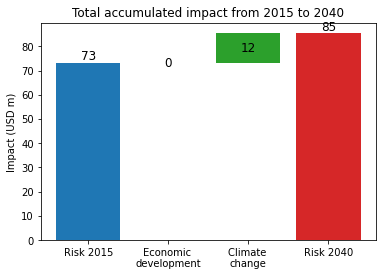

In [17]:
# change growth
growth_fact = 0.5 # < 1: sublinear, >1: superlinear
cb_acel_sub = CostBenefit()
cb_acel_sub.calc(haz_2015, ent_2015, haz_2040, ent_2040, imp_time_depen=growth_fact, save_imp=True)
cb_acel_sub.plot_waterfall_accumulated(haz_2015, ent_2015, ent_2040, imp_time_depen=growth_fact)

Aunque implementar las medidas seleccionadas podría evitar aproximadamente 30 millones de dólares (USD) en 26 años; esto no significa que se pueda evitar un evento extremo que genere daños de 30 millones de dólares, el cual podría ocurrir durante este período. Los eventos extremos, con períodos de retorno altos, pueden perturbar a las medidas que son efectivas, ya que fueron calculadas bajo el supuesto de una base de daño promedio.

Respetando el mismo código de colores de la figura de costo-beneficio, la siguiente figura muestra el daño evitado para diferentes tasas de retorno de riesgo por inundación (para el año 2040, incluyendo crecimiento económico y escenario de cambio climático). Se debe tener en cuenta que las medidas domésticas pueden ser muy efectivas para los eventos frecuentes por inundación, pero podrían cubrir una pequeña fracción de los eventos poco frecuentes:

<AxesSubplot:xlabel='Return Period (2040)', ylabel='Impact (USD)'>

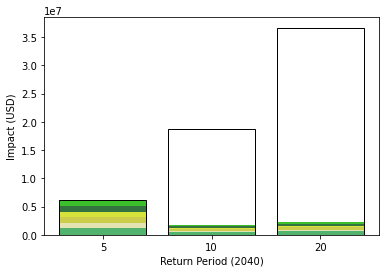

In [18]:
cb_acel.plot_event_view([5, 10, 20])

Si se complementa las medidas de adaptación con la transferencia de riesgos o seguros (como se muestra arriba), una fracción de riesgo sustancialmente mayor puede tratarse también en eventos de mayor periodo de retorno. La transferencia de riesgo es particularmente adecuada en el manejo de riesgo por eventos de baja frecuencia y alta severidad.

Se muestra en rojo claro la medida `Domestico`, y en rojo oscuro la cobertura de seguro.

<AxesSubplot:xlabel='Return Period (2040)', ylabel='Impact (USD)'>

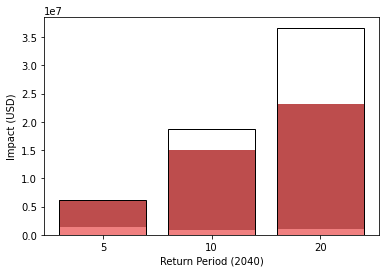

In [19]:
cb_comb.plot_event_view([5, 10, 20])